# Boston Airbnb Open Data

This data set was obtained from [Kaggle](https://www.kaggle.com/datasets/airbnb/boston).

this dataset describes the listing activity of homestays in Boston, MA.

The following Airbnb activity is included in this Boston dataset:

 - Listings, including full descriptions and average review score
 - Reviews, including unique id for each reviewer and detailed comments
 - Calendar, including listing id and the price and availability for that day

# Boston Airbnb Data Visualization

## Import Functions and load data

### Import cleaned listing data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# change default figure size to (10,5)

#plt.rc('figure', figsize=(10,5))

# reset the default

plt.rcdefaults()

In [2]:
# import listing data

#listing=pd.read_csv('airbnb_boston/listings_cleaned.csv')

listing=pd.read_csv('https://raw.githubusercontent.com/Suhong88/AA630_Spring2023/main/listings_cleaned.csv')

# import review data

reviews=pd.read_csv('https://raw.githubusercontent.com/Suhong88/AA630_Spring2023/main/airbnb_boston/reviews.csv')

# covert listing_id from int to object

reviews['listing_id']=reviews['listing_id'].astype('object')

# covert date from object to date

reviews['date']=pd.to_datetime(reviews.date)

## drop id from reviews table

reviews1=reviews.drop(['id'], axis=1)

# join listing and review tabel

df=listing.merge(reviews1, left_on='id', right_on='listing_id', how='inner')

df.head()

,id,listing_url,name,neighbourhood,city,state,zipcode,latitude,longitude,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,listing_id,date,reviewer_id,reviewer_name,comments
0,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,9.0,10.0,10.0,9.0,9.0,3075044,2014-06-01,9645972,Dmitrii,Andrea is a great host. Neighborhood is wonder...
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,9.0,10.0,10.0,9.0,9.0,3075044,2014-06-06,12020681,Paola,We had a great time at Andrea's place. He is v...
2,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,9.0,10.0,10.0,9.0,9.0,3075044,2014-06-30,8165047,Jaydee,Adrea was very welcoming and flexible to our n...
3,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,9.0,10.0,10.0,9.0,9.0,3075044,2014-09-18,21319433,Anthony,Andrea made us feel welcome because he made th...
4,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Roslindale,Boston,MA,02131,42.286241,-71.134374,Andrea,...,9.0,10.0,10.0,9.0,9.0,3075044,2014-09-27,21706950,Xinny,Me and my friend were so happy about Andrea's ...


# Matplotlib basics

## line plot

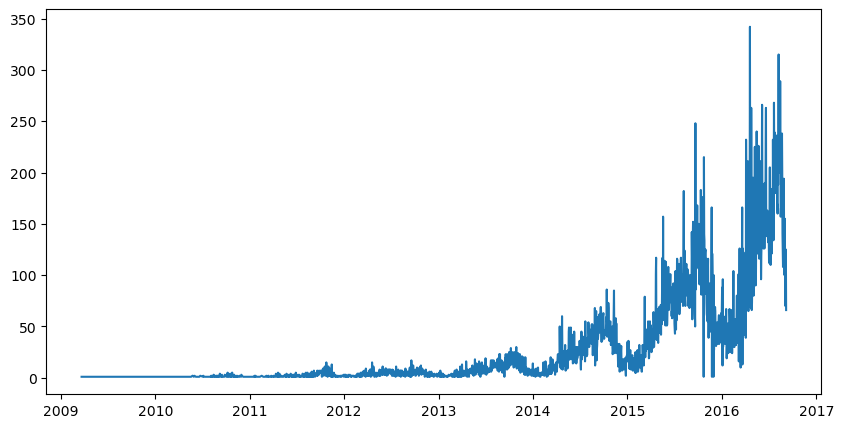

In [43]:
# display/visualize the number of reviews by date

result=df.groupby('date')['listing_id'].count().reset_index().rename(columns={'listing_id': 'numListings'})

#set figure size

#plt.figure(figsize=(10,5))

plt.plot('date', 'numListings', data=result)

# change the stype of figure

#plt.plot('date', 'numListings', 'or', data=result)

## Histogram

(array([3.2894e+04, 2.3379e+04, 8.3300e+03, 2.2730e+03, 8.0000e+02,
        2.9500e+02, 2.3000e+02, 4.9000e+01, 9.0000e+00, 1.0000e+00]),
 array([  20.,  118.,  216.,  314.,  412.,  510.,  608.,  706.,  804.,
         902., 1000.]),
 <BarContainer object of 10 artists>)

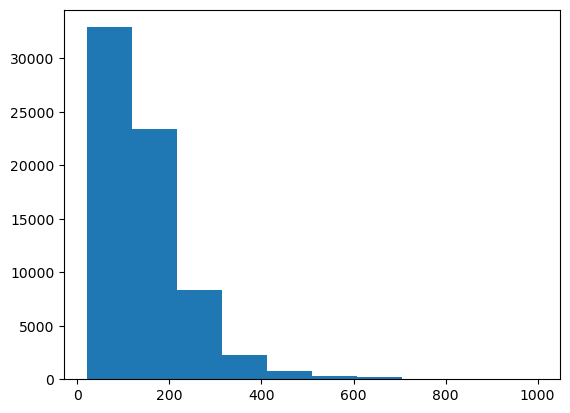

In [47]:
#shows the histogram of price
plt.hist(df['price'])

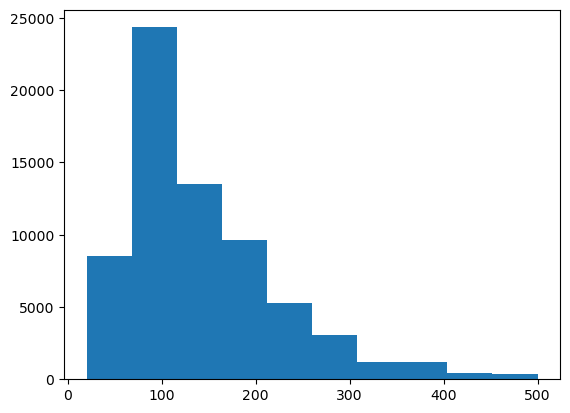

In [54]:
# limit to price below 500, use different number of bins

plt.hist(df[df.price<=500]['price'], bins=10)

# save figure

plt.savefig('figures/price_histogram.png')

# Ploting with Pandas

## line plot

<AxesSubplot:xlabel='date'>

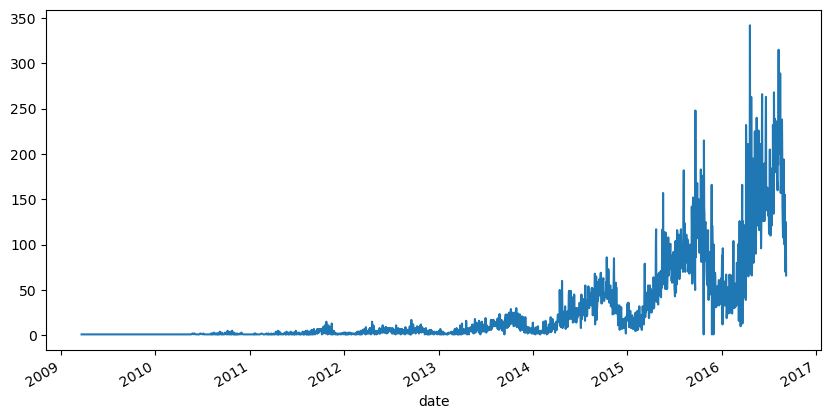

In [56]:
# number of reviews by date
result=df.groupby('date')['listing_id'].count()

result.plot(figsize=(10,5))

In [4]:
# show average price, max price and min price by day

result=df.groupby('date')['price'].agg(['mean', 'max', 'min'])

result

,mean,max,min
date,,,
2009-03-21,145.000000,145.0,145.0
2009-04-23,40.000000,40.0,40.0
2009-05-01,145.000000,145.0,145.0
2009-07-19,65.000000,65.0,65.0
2009-08-06,195.000000,195.0,195.0
...,...,...,...
2016-09-02,124.666667,450.0,22.0
2016-09-03,130.057143,375.0,37.0
2016-09-04,131.951220,450.0,22.0


<AxesSubplot:xlabel='date'>

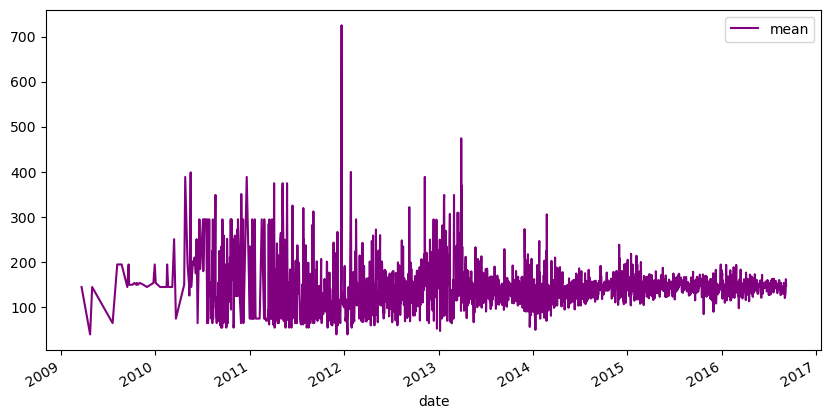

In [104]:
# visualize average price by date

result.plot(kind='line', y='mean', figsize=(10,5), color='purple', linestyle='solid')

<AxesSubplot:title={'center':'Airbnb Price between 2009 and 2017'}, xlabel='date'>

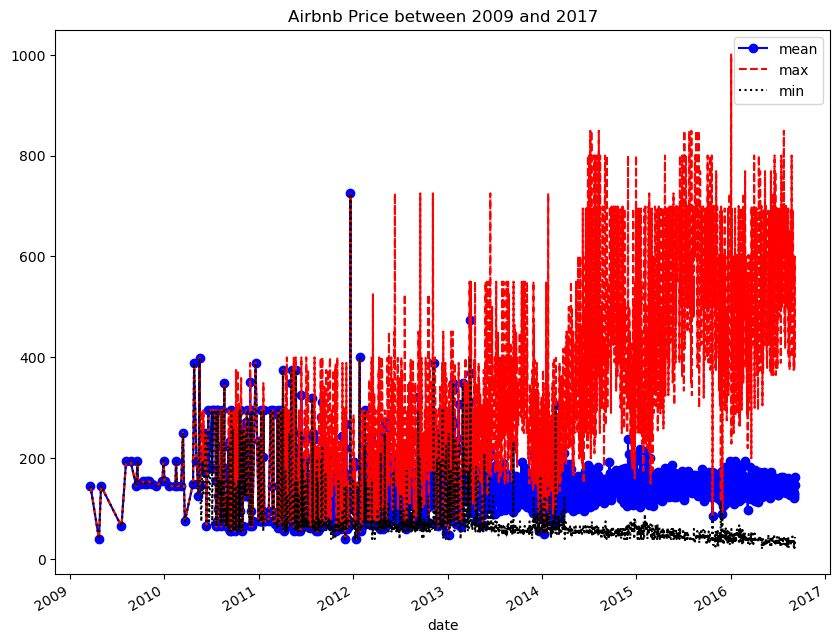

In [105]:
# visualize average, max, min price by date

result.plot(style=['o-b', '--r', ':k'], title="Airbnb Price between 2009 and 2017", figsize=(10,8))

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

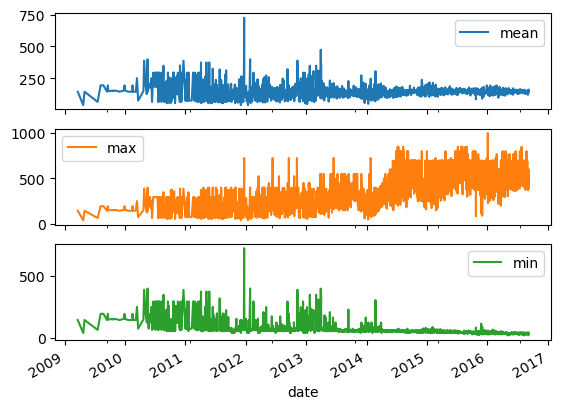

In [113]:
# visualize each graph as a subplot

result.plot(kind='line', subplots=True, layout=(3,1))

<AxesSubplot:title={'center':'Airbnb Price between 2009 and 2017'}, xlabel='date'>

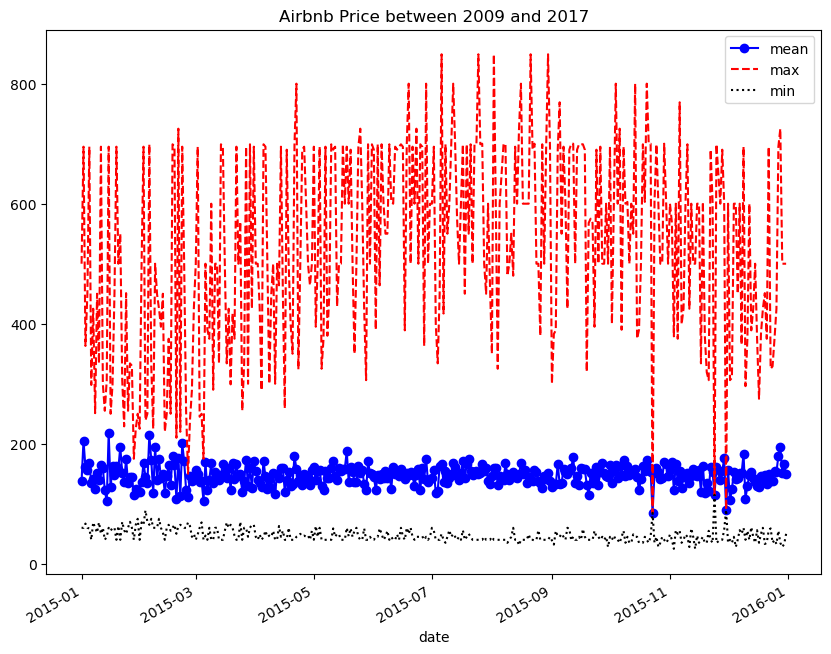

In [10]:
# visualize average, max, min price by date for a particular year

result[result.index.year==2015].plot(style=['o-b', '--r', ':k'], title="Airbnb Price between 2009 and 2017", figsize=(10,8))

## scatter plot

<AxesSubplot:title={'center':'Airbnb Reiview Sccore Rating vs. Price'}, xlabel='review_scores_rating', ylabel='price'>

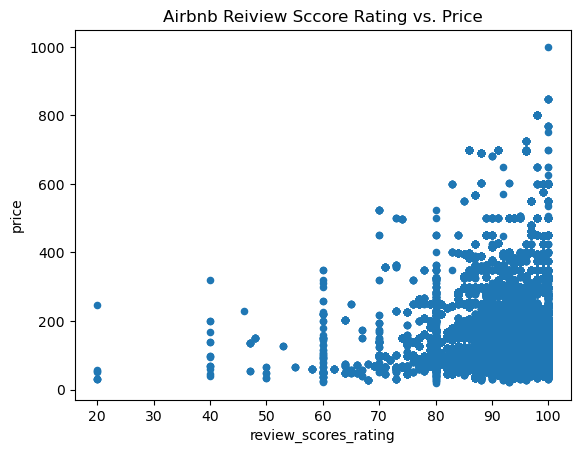

In [3]:
# we want to see whether review score rating is related to price
# create a scatter plot between airbnb review scores and price

df.plot(kind='scatter', x='review_scores_rating', y='price', title='Airbnb Reiview Sccore Rating vs. Price')

<AxesSubplot:title={'center':'Airbnb Reivefw Sccore Rating vs. Price'}, xlabel='review_scores_rating', ylabel='price'>

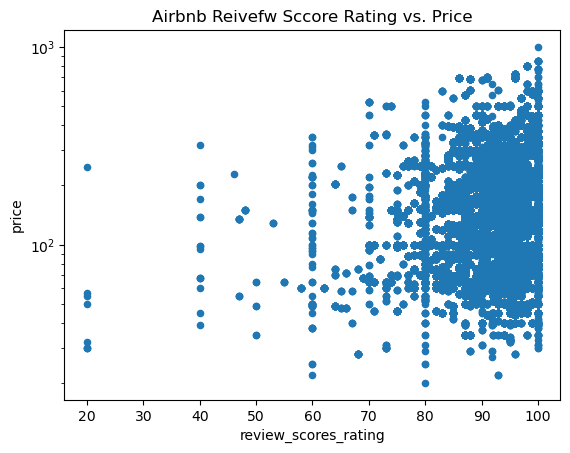

In [4]:
# change y(price) to log

df.plot(kind='scatter', x='review_scores_rating', y='price', title='Airbnb Review Sccore Rating vs. Price', 
       logy=True)

<AxesSubplot:title={'center':'Airbnb Review Sccore Rating vs. Price'}, xlabel='review_scores_rating', ylabel='price'>

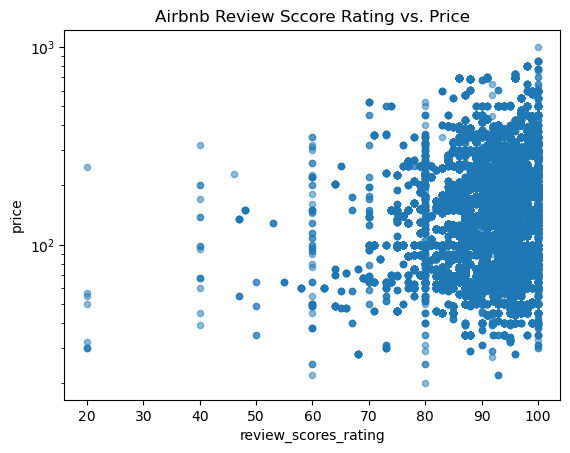

In [5]:
# use alpha to control the transparency of the points

df.plot(kind='scatter', x='review_scores_rating', y='price', title='Airbnb Review Sccore Rating vs. Price', 
       logy=True, alpha=0.5)

C:\Users\sli\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Airbnb Reivefw Sccore Rating vs. Price'}, xlabel='review_scores_rating', ylabel='price'>

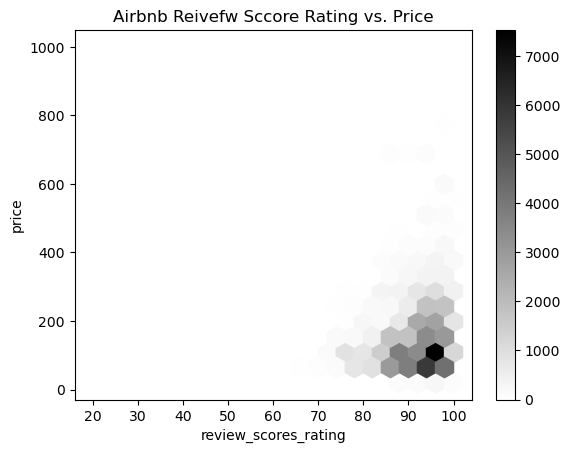

In [6]:
# use hexbins

df.plot(kind='hexbin', x='review_scores_rating', y='price', title='Airbnb Reivefw Sccore Rating vs. Price', 
        colormap='gray_r', gridsize=20, sharex=False)

<AxesSubplot:title={'center':'Airbnb Reivefw Sccore Rating vs. Price'}, xlabel='review_scores_rating', ylabel='price'>

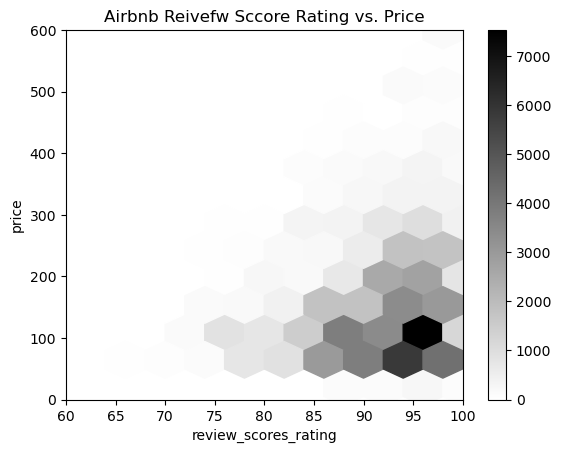

In [126]:
# use hexbins

df.plot(kind='hexbin', x='review_scores_rating', y='price', title='Airbnb Reivefw Sccore Rating vs. Price', 
        colormap='gray_r', xlim=(60, 100),ylim=(0, 600), gridsize=20, sharex=False)

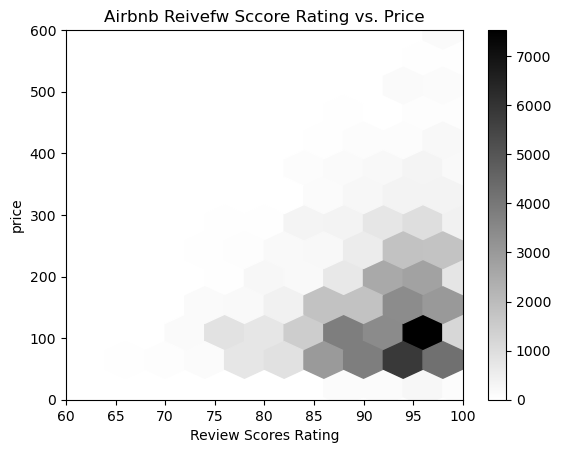

In [131]:
# set the limit for x label and y label

df1=df.rename(columns={'review_scores_rating': 'Review Scores Rating'})

df1.plot(kind='hexbin', x='Review Scores Rating', y='price', title='Airbnb Reivefw Sccore Rating vs. Price', 
        colormap='gray_r', xlim=(60, 100),ylim=(0, 600), gridsize=20, sharex=False)

## Pandas Plot- Distribution

Text(0.5, 0, 'price')

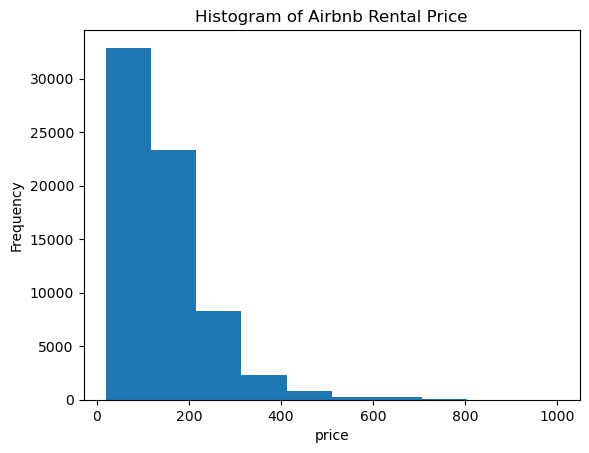

In [132]:
# histogram
# visualize histogram of price

df.price.plot(kind='hist', title='Histogram of Airbnb Rental Price')

plt.xlabel('price')

Text(0.5, 0, 'price')

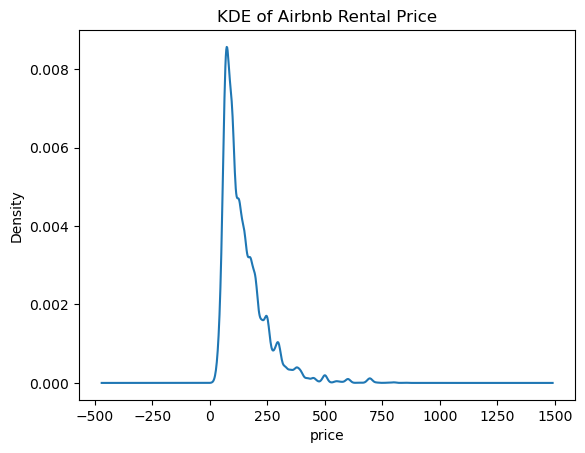

In [133]:
# Kernal Density Estimates (KDE)
# visualize KDE of price

df.price.plot(kind='kde', title='KDE of Airbnb Rental Price')

plt.xlabel('price')

Text(0.5, 0, 'price')

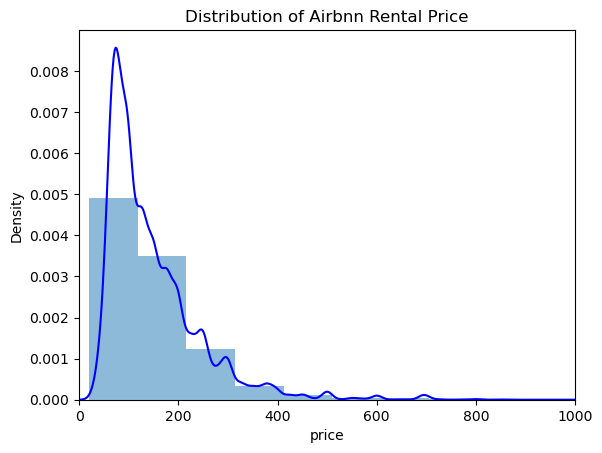

In [136]:
# combine histogram and kde

ax=df.price.plot(kind='hist', density=True, alpha=0.5)

df.price.plot(
    ax=ax,
    kind='kde',
    color='blue',
    title="Distribution of Airbnn Rental Price",
    xlim=(0, 1000)
)

plt.xlabel('price')

## Pandas Plot - Boxplot

<AxesSubplot:title={'center':'Airbnb Rentail Box Plot'}>

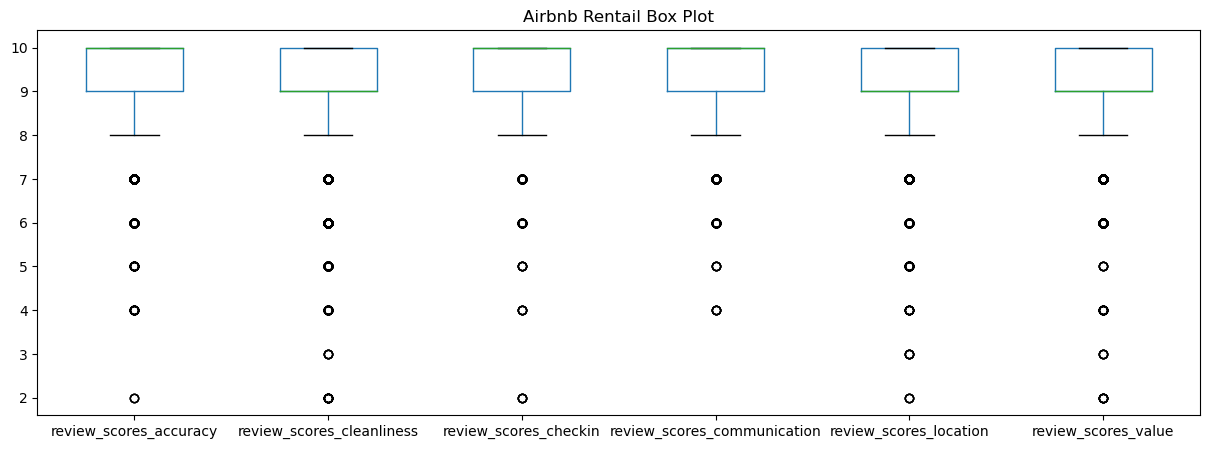

In [144]:
# show box plot for all review scores.

df.loc[:, ['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].plot(
kind='box',
figsize=(15,5),
title="Airbnb Rentail Box Plot")

In [13]:
# calssify price into four level

df['price_level']=pd.cut(df.price, bins=[0, 100, 200, 300, 1000], labels=['low (0-100)', 'medium (100-200)', 'high(200-300)', 'very high(>300)'])
df['price_level'].value_counts()

low (0-100)         29669
medium (100-200)    25760
high(200-300)        8832
very high(>300)      3999
Name: price_level, dtype: int64

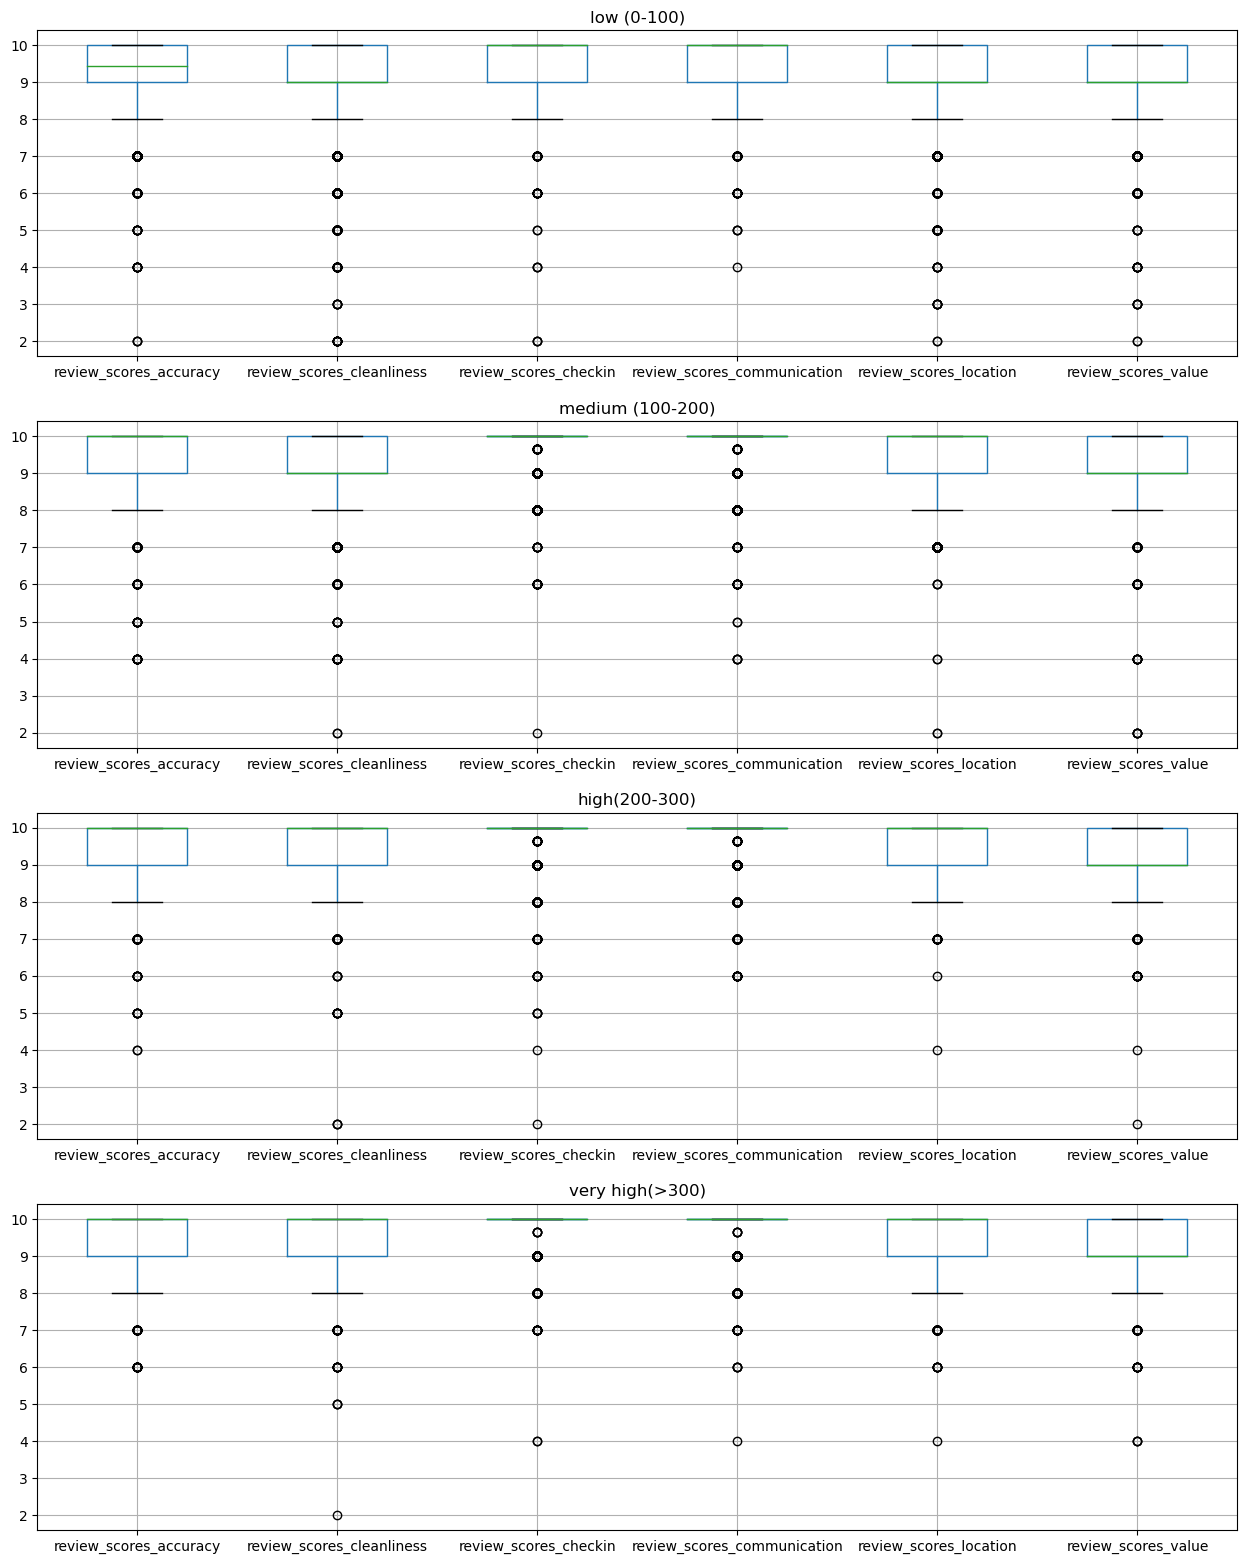

In [165]:
# for each price level, show  box plot for all review scores.

df.loc[:, ['price_level', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].groupby('price_level').boxplot(
layout=(4,1), 
figsize=(15,20))

plt.supbtitle=("Airbnb Rentail Box Plot")

## Pandas Plot- Barplot

Text(0.5, 0, 'neighnourhood')

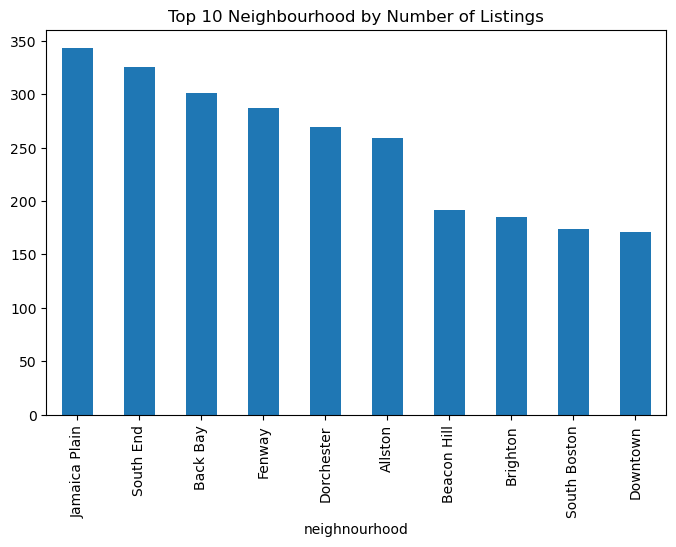

In [190]:
# visualize top 10 neighbourhood by number of listings

result=listing['neighbourhood'].value_counts().head(10)

result.plot(
    kind='bar',
    figsize=(8,5),
      title="Top 10 Neighbourhood by Number of Listings"
)

plt.xlabel('neighnourhood')

In [179]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0.5, 0, 'neighnourhood')

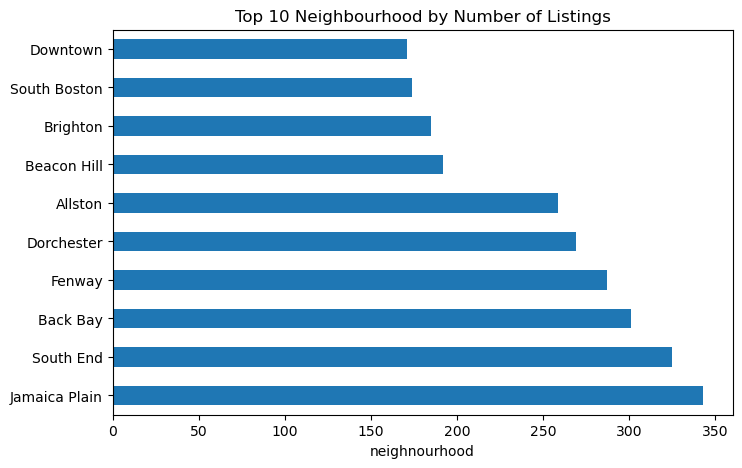

In [189]:
# change bar color for top 10 neighbourhood by number of listings

result=listing['neighbourhood'].value_counts().head(10)

result.plot(
    kind='barh',
    figsize=(8,5),
    title="Top 10 Neighbourhood by Number of Listings"
)

plt.xlabel('neighnourhood')

<AxesSubplot:title={'center':'Number of Listings by Neighbourhood and by Room Type'}, xlabel='neighbourhood'>

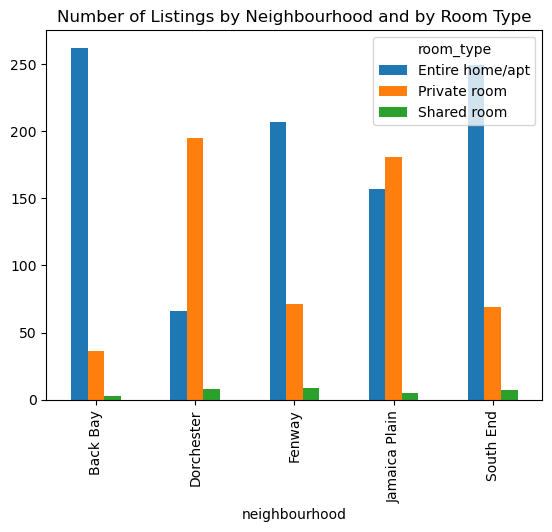

In [14]:
# display/visualize number of listings by neighbourhood and by room type. Limit to top 5 neighbourhood

top5=listing['neighbourhood'].value_counts().head(5).index

# need to use unstack() to change neighbourhood and room_type to row/column dimension

result=listing[listing['neighbourhood'].isin(top5)].groupby(['neighbourhood', 'room_type'])['id'].\
count().unstack()

result.plot.bar(title="Number of Listings by Neighbourhood and by Room Type")

Text(0.5, 0, 'number of listings')

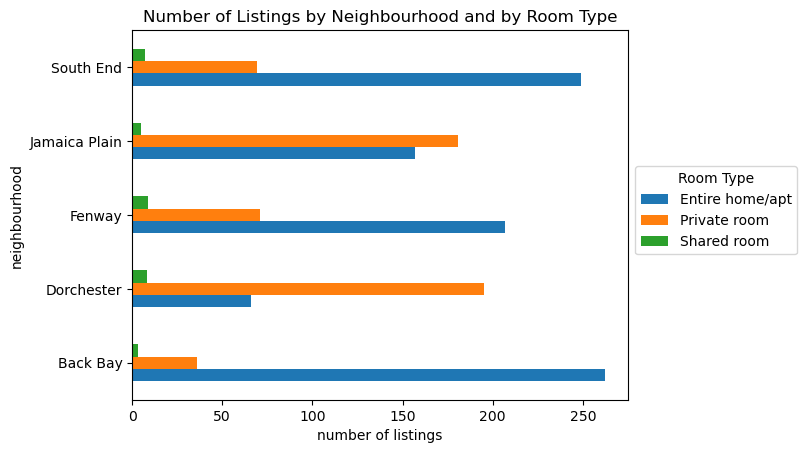

In [15]:
# display/visualize number of listings by neighbourhood and by room type. Limit to top 5 neighbourhood
# change the location of the label

top5=listing['neighbourhood'].value_counts().head(5).index

# need to use unstack() to change neighbourhood and room_type to row/column dimension

result=listing[listing['neighbourhood'].isin(top5)].groupby(['neighbourhood', 'room_type'])['id'].\
count().unstack()

result.plot.barh(title="Number of Listings by Neighbourhood and by Room Type")

plt.legend(title='Room Type', bbox_to_anchor=(1, 0.65))

plt.xlabel('number of listings')

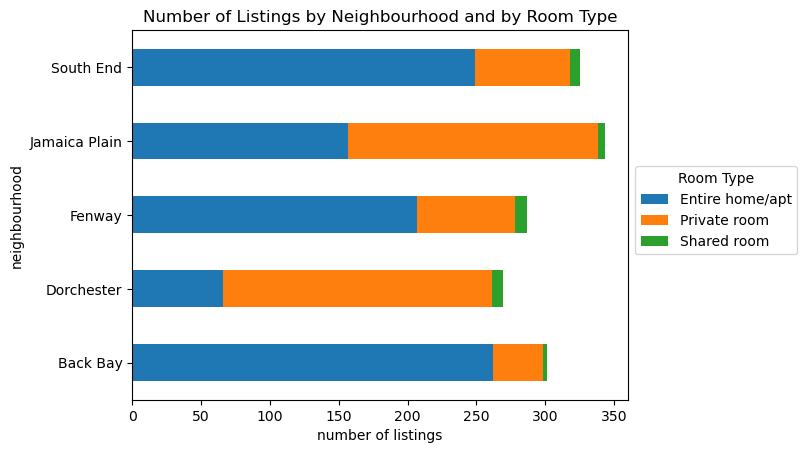

In [232]:
# Number of listings by neighbourhood and by room type. Limit to top 5 neighbourhood
# use stacked bar chart

top5=listing['neighbourhood'].value_counts().head(5).index

# need to use unstack() to change neighbourhood and room_type to row/column dimension

result=listing[listing['neighbourhood'].isin(top5)].groupby(['neighbourhood', 'room_type'])['id'].\
count().unstack()

result.plot.barh(title="Number of Listings by Neighbourhood and by Room Type", stacked=True)

plt.legend(title='Room Type', bbox_to_anchor=(1, 0.65))

plt.xlabel('number of listings')

plt.savefig("figures/numListingsByRoomTypeByNeighbourhood")

## Seabron: Visualize categorical data

## stripplot

Text(0.5, 1.0, 'Comparing price by top 5 neighbourhood and room type')

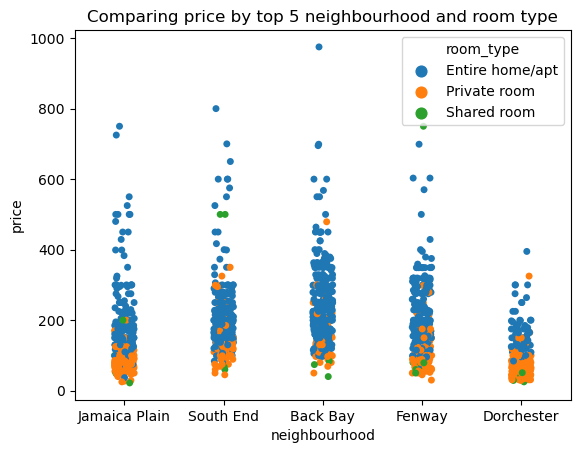

In [266]:
# using stripplot to visualize price by top 5 neighbourhood and room type

top5=listing['neighbourhood'].value_counts().head(5).index

result=listing[listing['neighbourhood'].isin(top5)]

sns.stripplot(
x='neighbourhood',
y='price',
hue='room_type',
data=result)

plt.title("Comparing price by top 5 neighbourhood and room type")

## swarmplot

C:\Users\sli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.3% of the points cannot be

Text(0.5, 1.0, 'Comparing price by top 5 neighbourhood and room type')

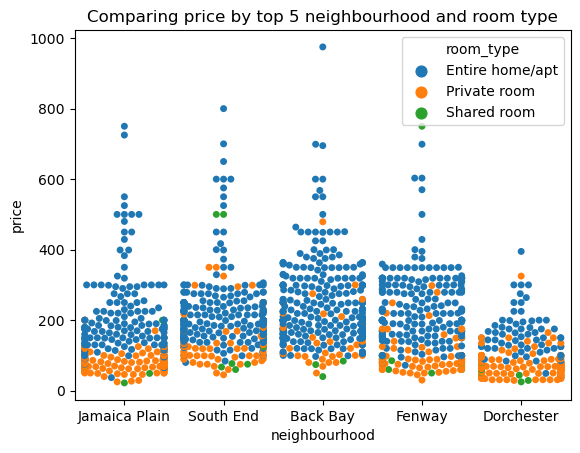

In [267]:
# using swardplot to visualize price by top 5 neighbourhood and room type

top5=listing['neighbourhood'].value_counts().head(5).index

result=listing[listing['neighbourhood'].isin(top5)]
sns.swarmplot(
x='neighbourhood',
y='price',
hue='room_type',
data=result)

plt.title("Comparing price by top 5 neighbourhood and room type")

## boxplot

Text(0.5, 1.0, 'Comparing price by top 5 neighbourhood')

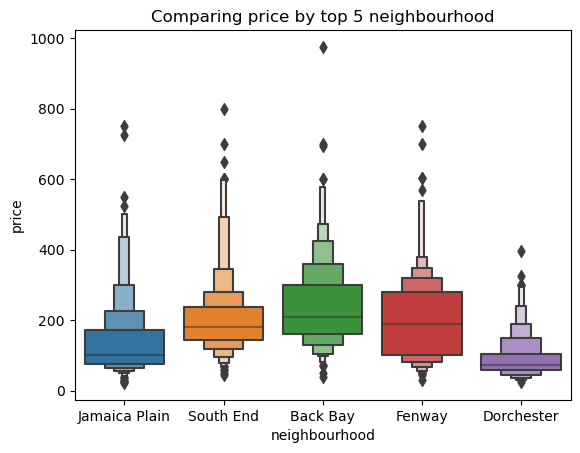

In [265]:
# show boxplot of price for each top 5 neighbourhood

top5=listing['neighbourhood'].value_counts().head(5).index

sns.boxenplot(x='neighbourhood',
              y='price',
              data=listing[listing['neighbourhood'].isin(top5)]
             )
plt.title("Comparing price by top 5 neighbourhood")

## violinplot

Text(0.5, 1.0, 'Comparing price by top 5 neighbourhood')

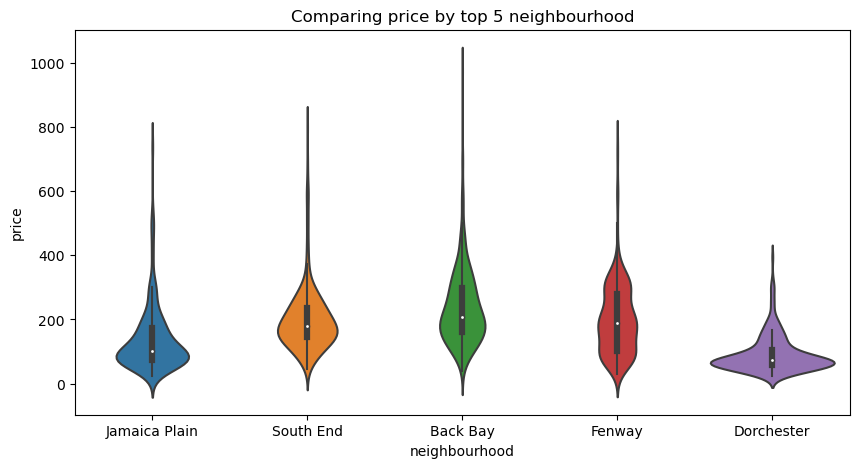

In [264]:
# show violinplot of price for each top 5 neighbourhood

top5=listing['neighbourhood'].value_counts().head(5).index

fig, axes=plt.subplots(figsize=(10,5))

sns.violinplot(x='neighbourhood',
              y='price',
              ax=axes,
              data=listing[listing['neighbourhood'].isin(top5)])
plt.title("Comparing price by top 5 neighbourhood")

## Seaborn: Correlation and heatmap

Which features have an impact on price?

In [273]:
df.columns

Index(['id', 'listing_url', 'name', 'neighbourhood', 'city', 'state',
       'zipcode', 'latitude', 'longitude', 'host_name', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'listing_id', 'date',
       'reviewer_id', 'reviewer_name', 'comments', 'price_level'],
      dtype='object')

<AxesSubplot:>

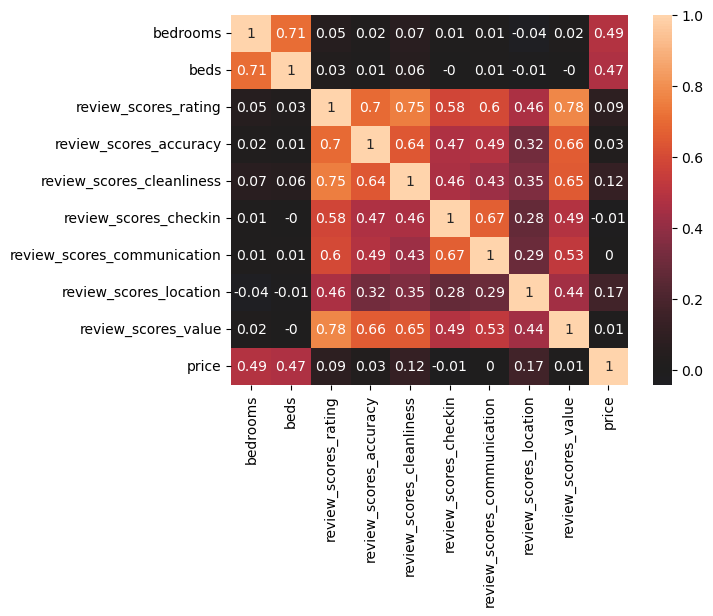

In [281]:
# show a heatmap of selected features

selected_columns=['bedrooms', 'beds',
      'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'price']

sns.heatmap(
    listing[selected_columns].corr().round(2),
    annot=True,
    center=0)

## Seaborn: pairplot

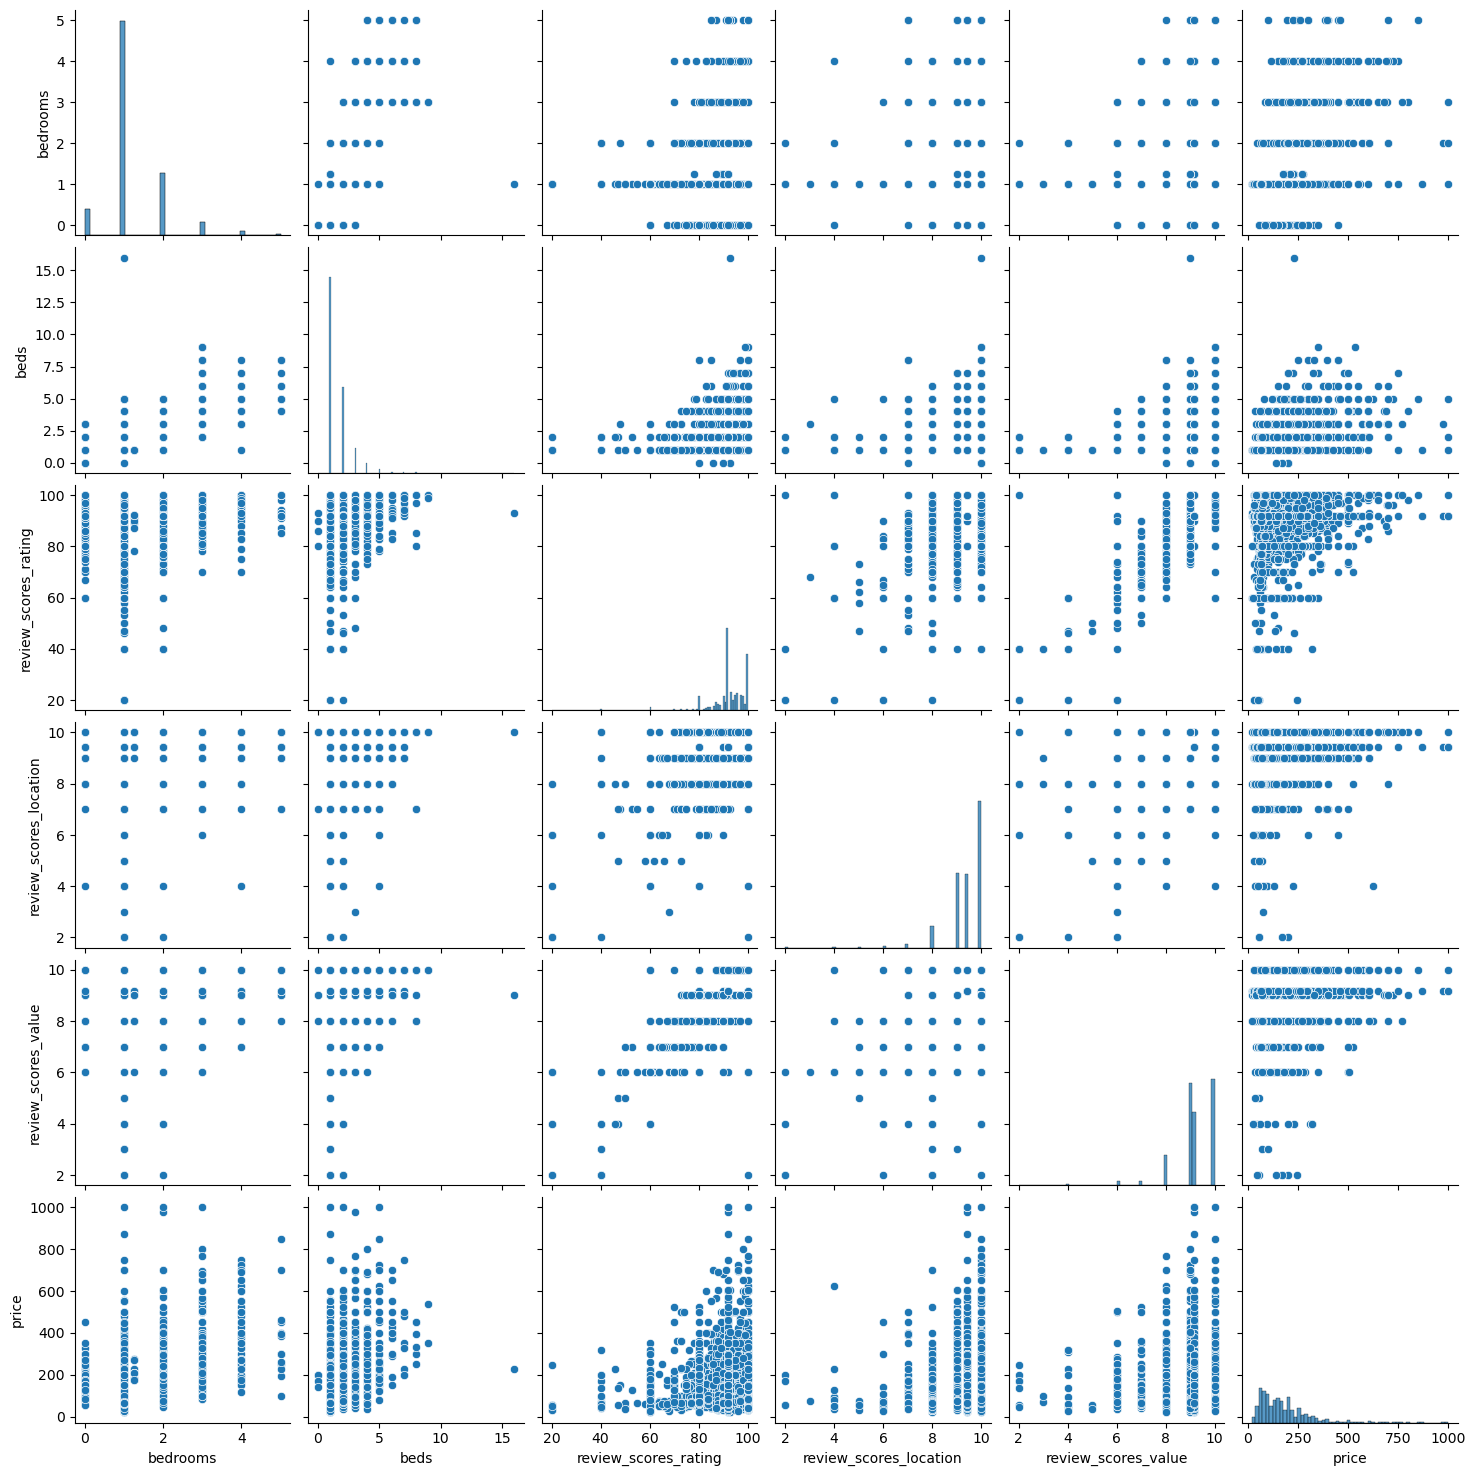

In [285]:
# createa pairplot of selected features

selected_columns=['bedrooms', 'beds',
      'review_scores_rating',
       'review_scores_location', 'review_scores_value', 'price']

result=listing[selected_columns]

sns.pairplot(result)

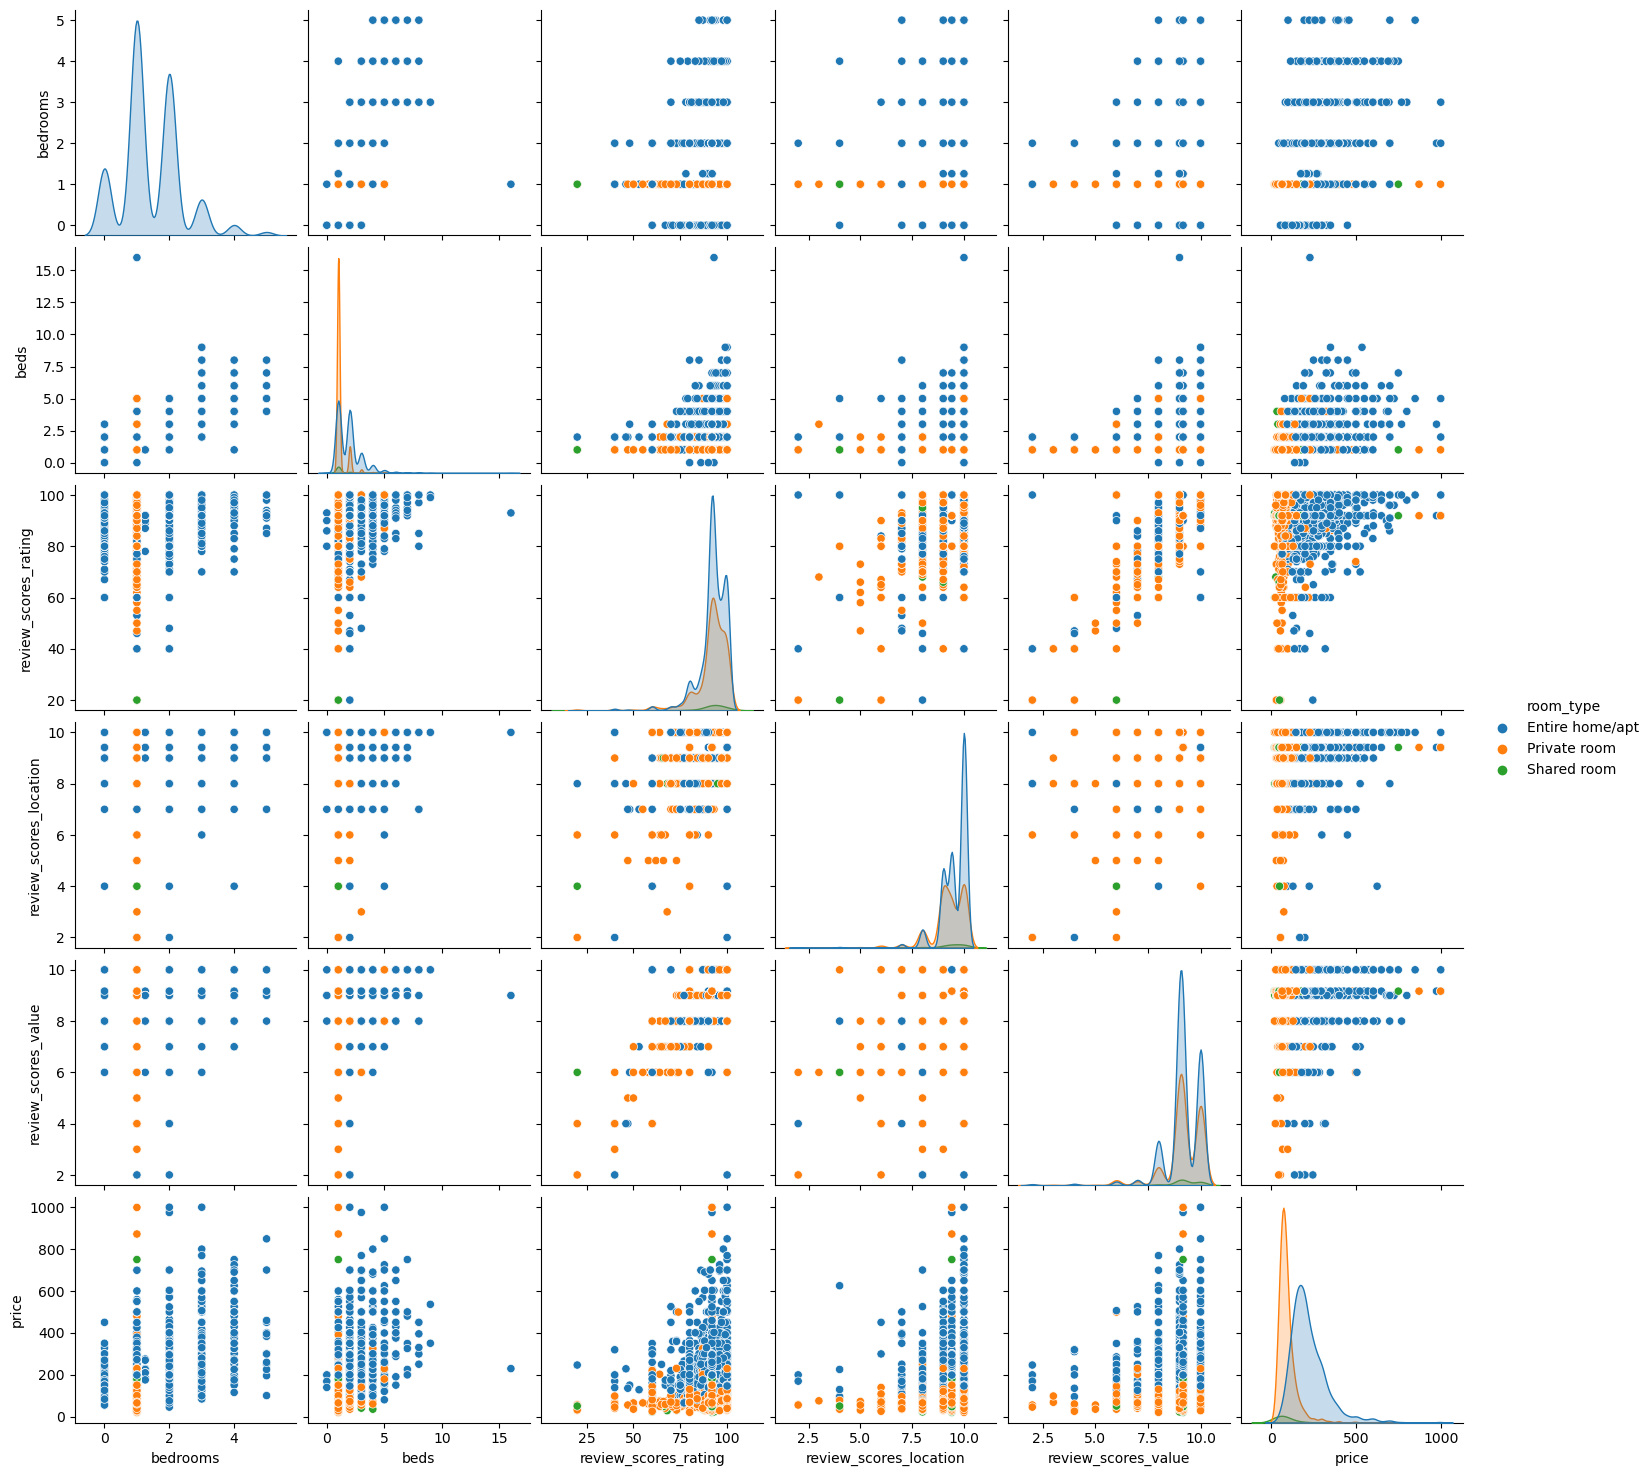

In [286]:
# # createa pairplot of selected features
# change diagonal chart to kde

selected_columns=['bedrooms', 'beds',
      'review_scores_rating',
       'review_scores_location', 'review_scores_value', 'price', 'room_type']

result=listing[selected_columns]

sns.pairplot(result, diag_kind="kde", hue="room_type")

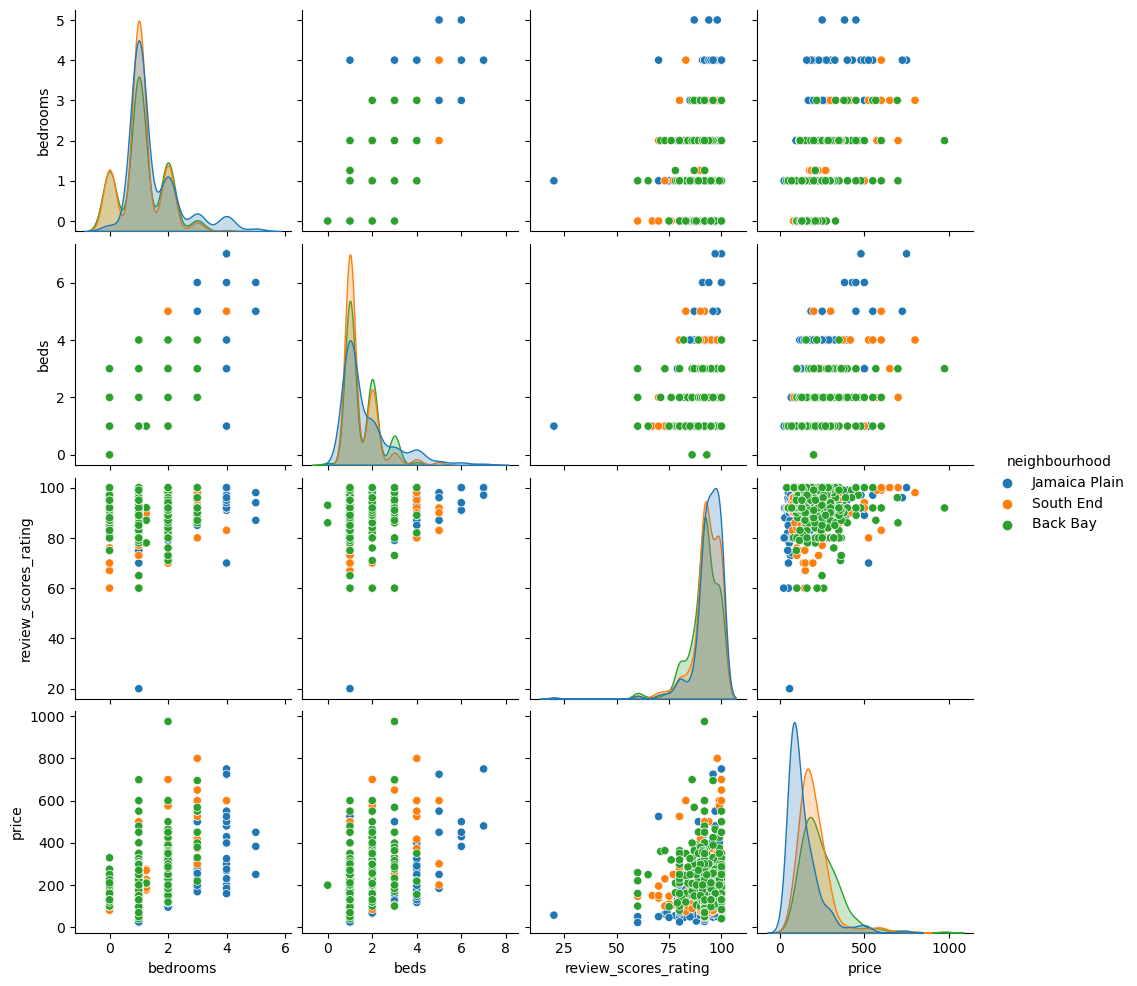

In [11]:
# reduce neighbourhood to top 3
top3=listing['neighbourhood'].value_counts().head(3).index

selected_columns=['bedrooms', 'beds',
      'review_scores_rating',
      'price', 'neighbourhood']

result=listing[selected_columns][listing['neighbourhood'].isin(top3)]

sns.pairplot(result, diag_kind="kde", hue="neighbourhood")


## Seaborn: jointplot 

Based on two numerical varabiles


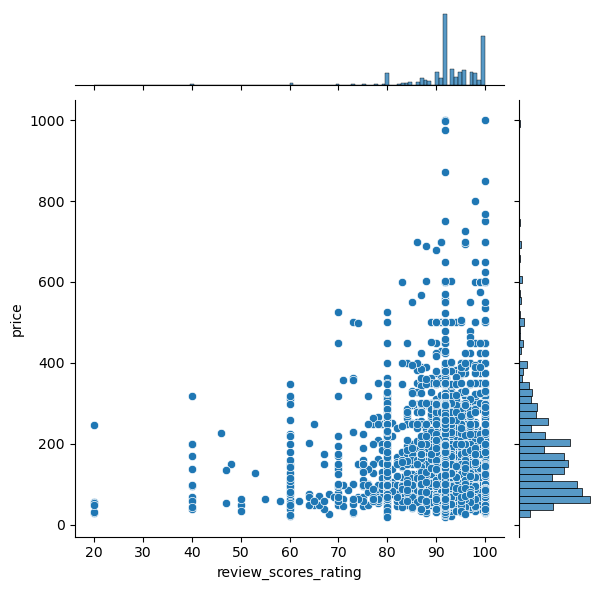

In [293]:
# Visualize the overall review score rating and price

sns.jointplot(
x='review_scores_rating',
y='price',
data=listing)

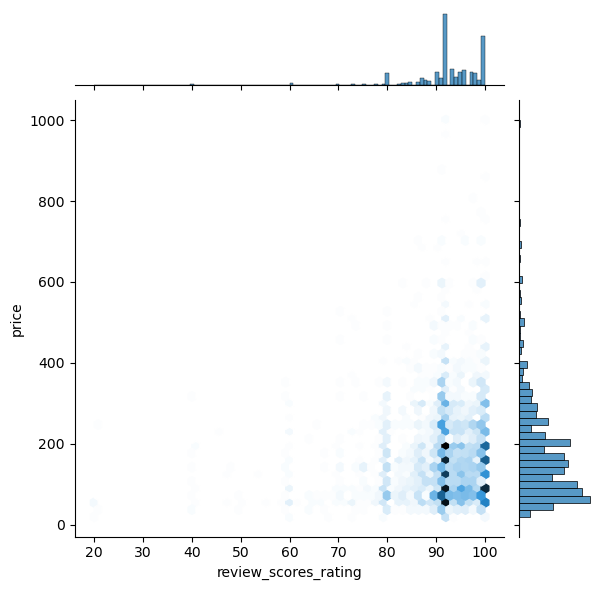

In [294]:
# visualize the overall review score rating and price
# use hex

sns.jointplot(
x='review_scores_rating',
y='price',
kind='hex',
data=listing)

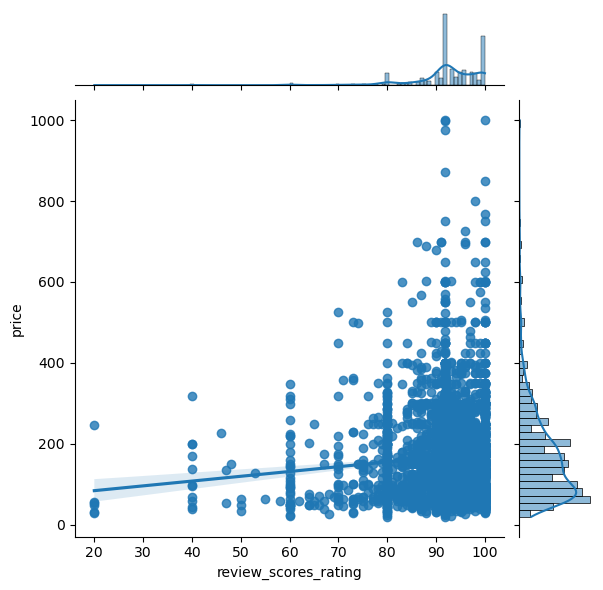

In [295]:
# visualize the overall review score rating and price
# use regression line

sns.jointplot(
x='review_scores_rating',
y='price',
kind='reg',
data=listing)

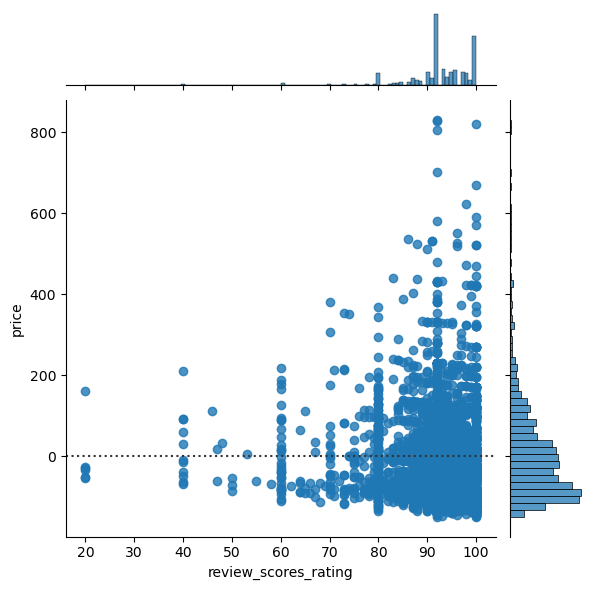

In [296]:
# visualize the overall review score rating and price
# use regression residual

sns.jointplot(
x='review_scores_rating',
y='price',
kind='resid',
data=listing)

## Seaborn - Using Faceting

In [298]:
result.columns

Index(['bedrooms', 'beds', 'review_scores_rating', 'price', 'neighbourhood'], dtype='object')

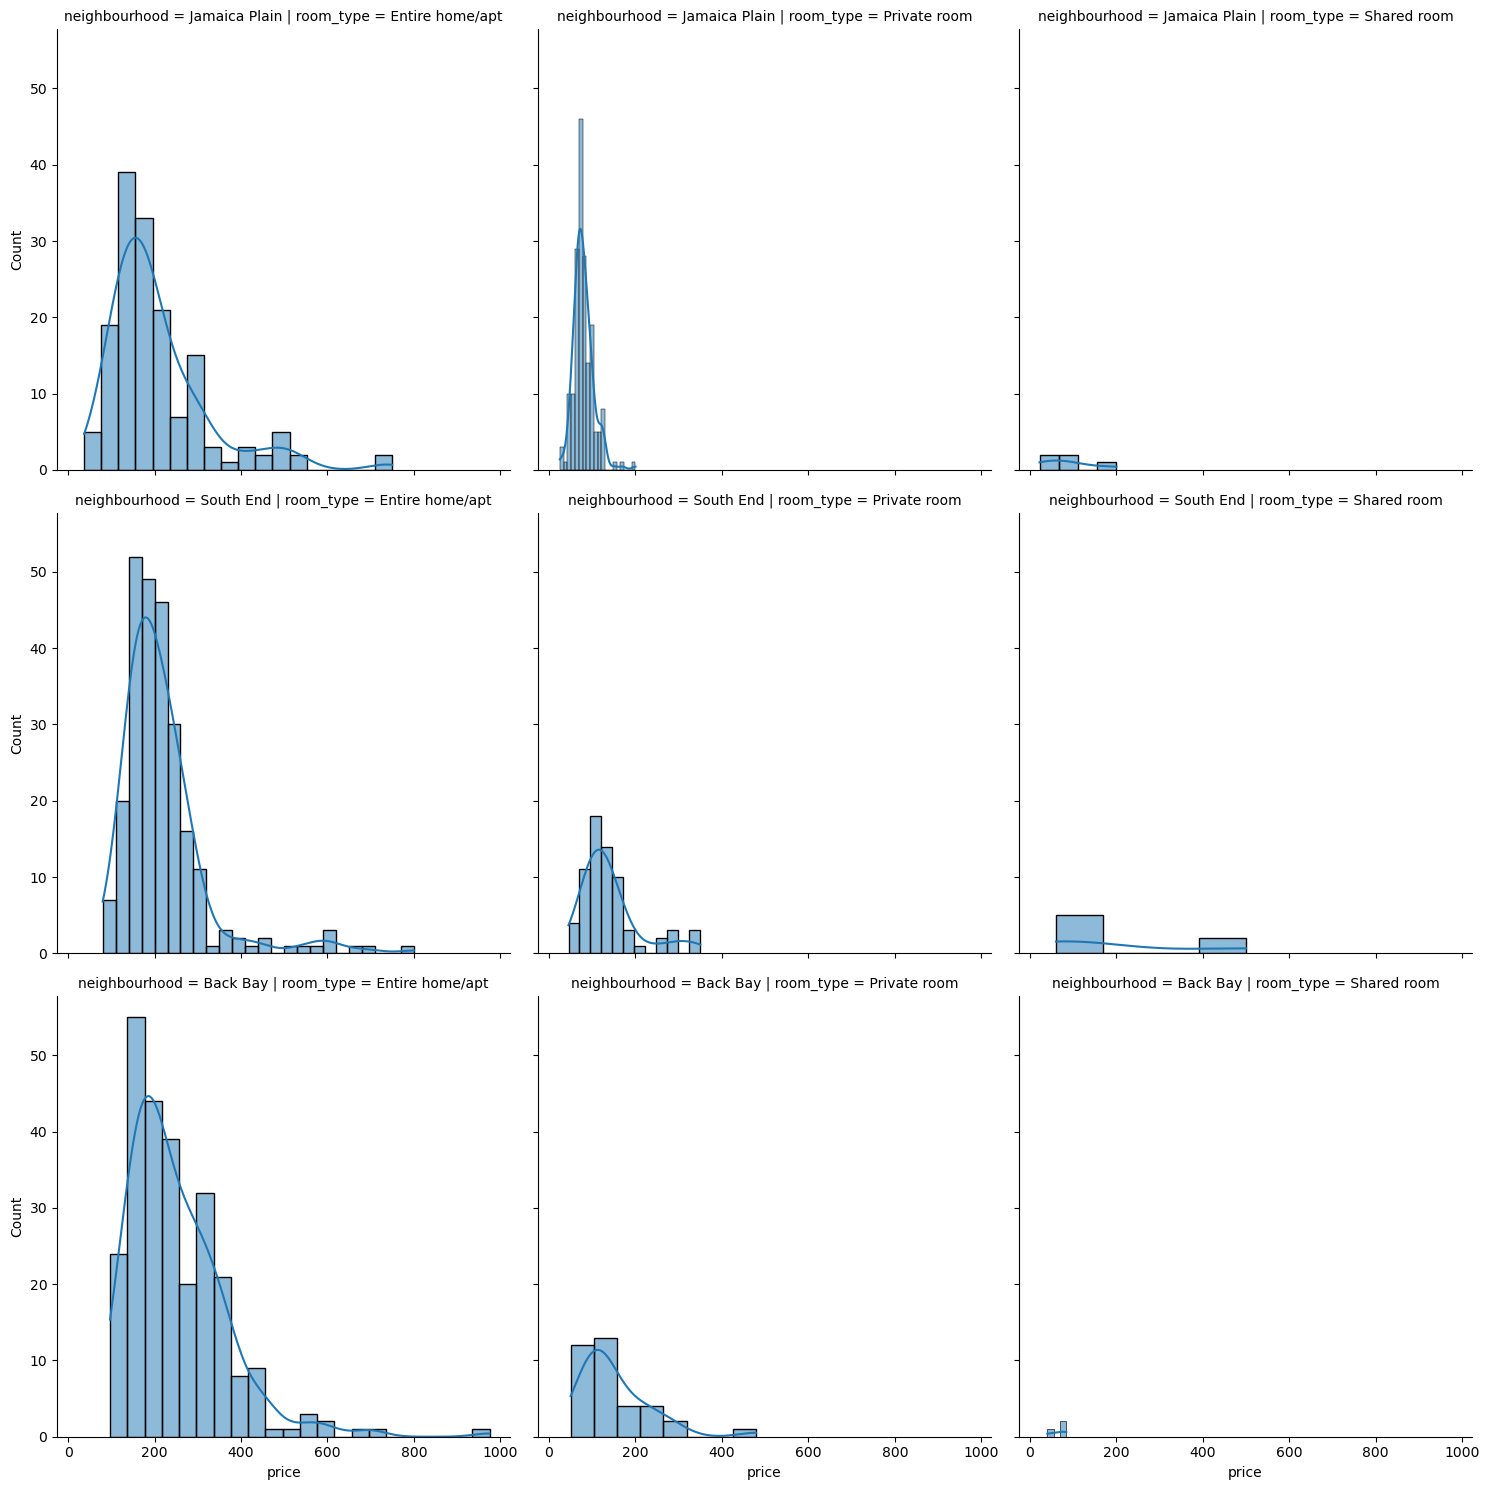

In [304]:
top3=listing['neighbourhood'].value_counts().head(3).index

result=listing[listing['neighbourhood'].isin(top3)]


g=sns.FacetGrid(result, row='neighbourhood', col='room_type', height=5)

g=g.map(sns.histplot, 'price', kde=True)

C:\Users\sli\AppData\Local\Temp/ipykernel_20132/2839970326.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result=listing[listing['neighbourhood'].isin(top3)][listing['room_type']!="Shared room"]


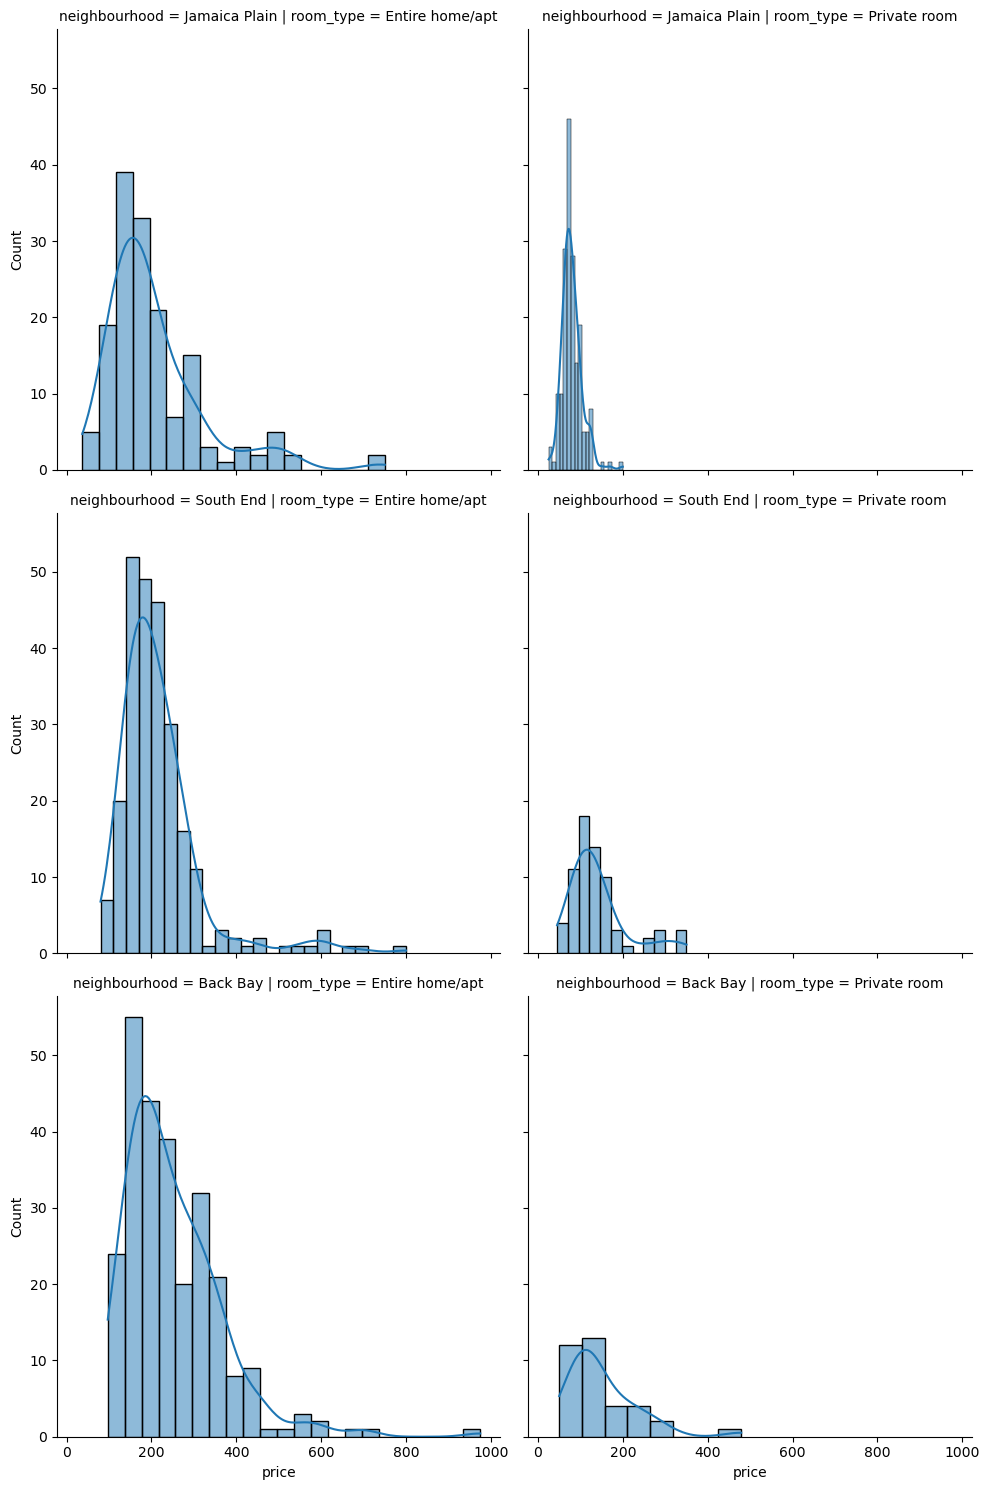

In [308]:
# modify the above chart to remove shared room
top3=listing['neighbourhood'].value_counts().head(3).index

result=listing[listing['neighbourhood'].isin(top3)][listing['room_type']!="Shared room"]


g=sns.FacetGrid(result, row='neighbourhood', col='room_type', height=5)

g=g.map(sns.histplot, 'price', kde=True)

C:\Users\sli\AppData\Local\Temp/ipykernel_20132/1042890630.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result=listing[listing['neighbourhood'].isin(top3)][listing['room_type']!="Shared room"]


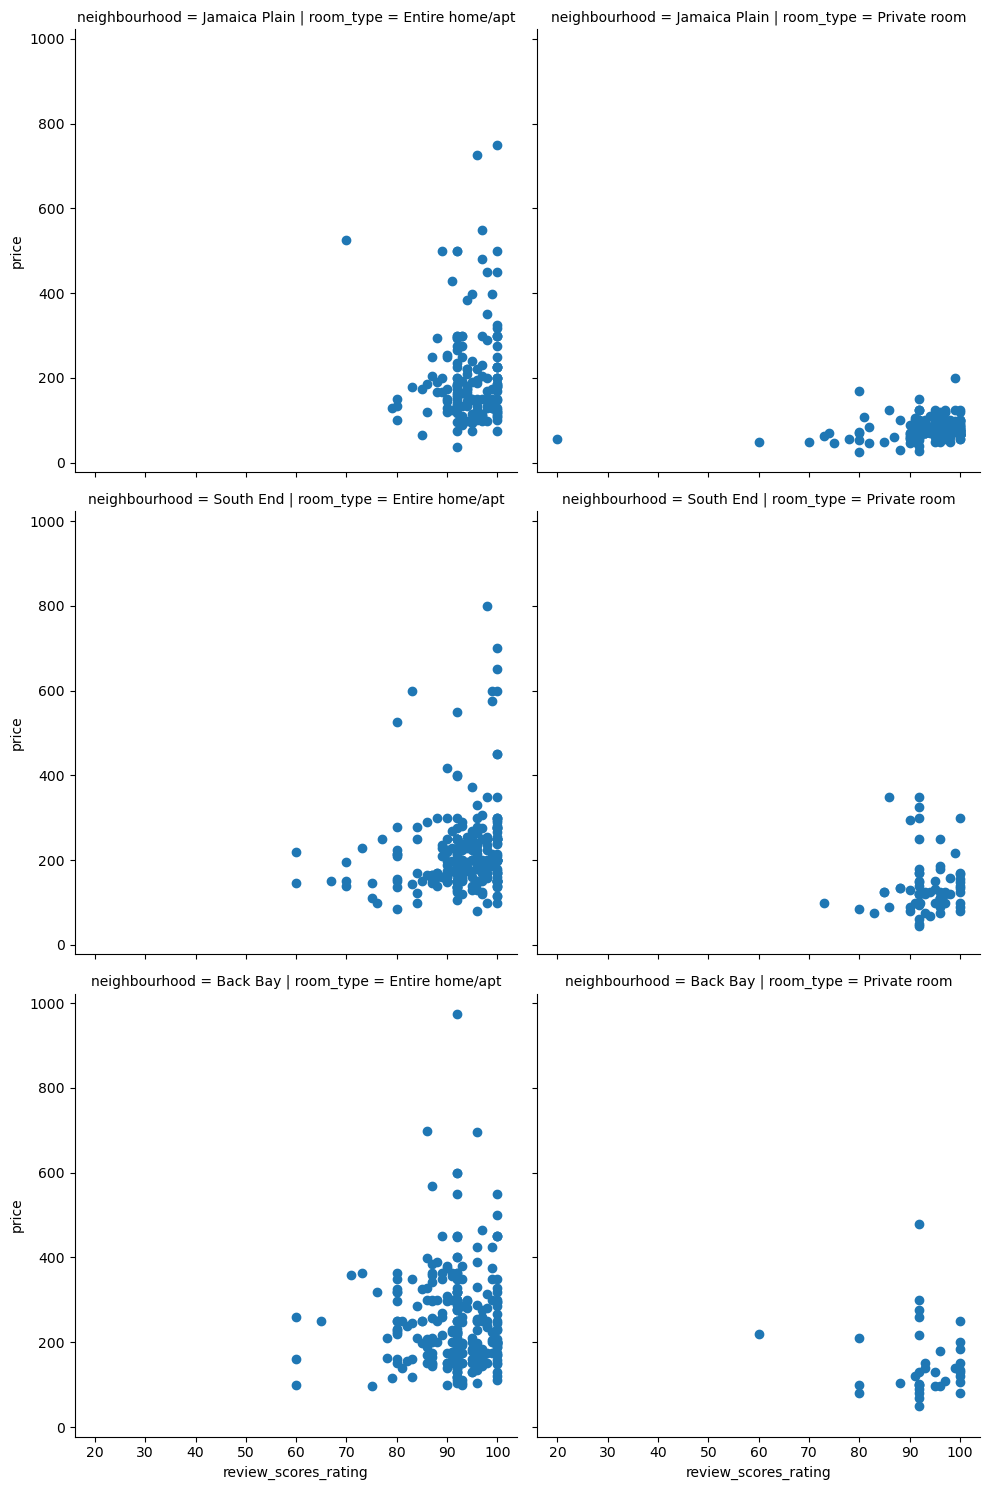

In [310]:
# modify the above chart to remove shared room

top3=listing['neighbourhood'].value_counts().head(3).index

result=listing[listing['neighbourhood'].isin(top3)][listing['room_type']!="Shared room"]


g=sns.FacetGrid(result, row='neighbourhood', col='room_type', height=5)

g=g.map(plt.scatter, 'review_scores_rating', 'price')

## Using sequential color

[Choosing Color Palettes in Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [317]:
# top 10 neighbourhood by number of listings

result=listing.groupby('neighbourhood')['id'].count().nlargest(10).reset_index().rename(columns={"id":"numListings"})
result

,neighbourhood,numListings
0,Jamaica Plain,343
1,South End,325
2,Back Bay,301
3,Fenway,287
4,Dorchester,269
5,Allston,259
6,Beacon Hill,192
7,Brighton,185
8,South Boston,174
9,Downtown,171


<AxesSubplot:xlabel='numListings', ylabel='neighbourhood'>

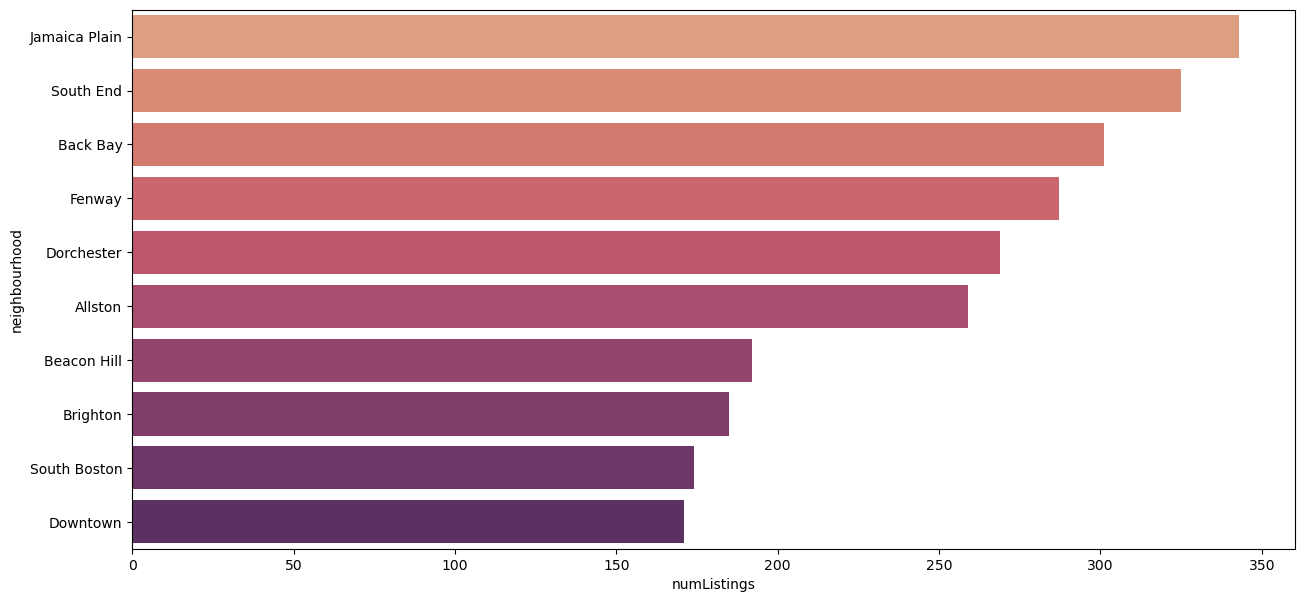

In [319]:
# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 15 variations
palette=sns.color_palette("flare", 10)

# plot a bar chart
sns.barplot(
    x="numListings", 
    y="neighbourhood", 
    data=result, 
    palette=palette)

<AxesSubplot:xlabel='numListings', ylabel='neighbourhood'>

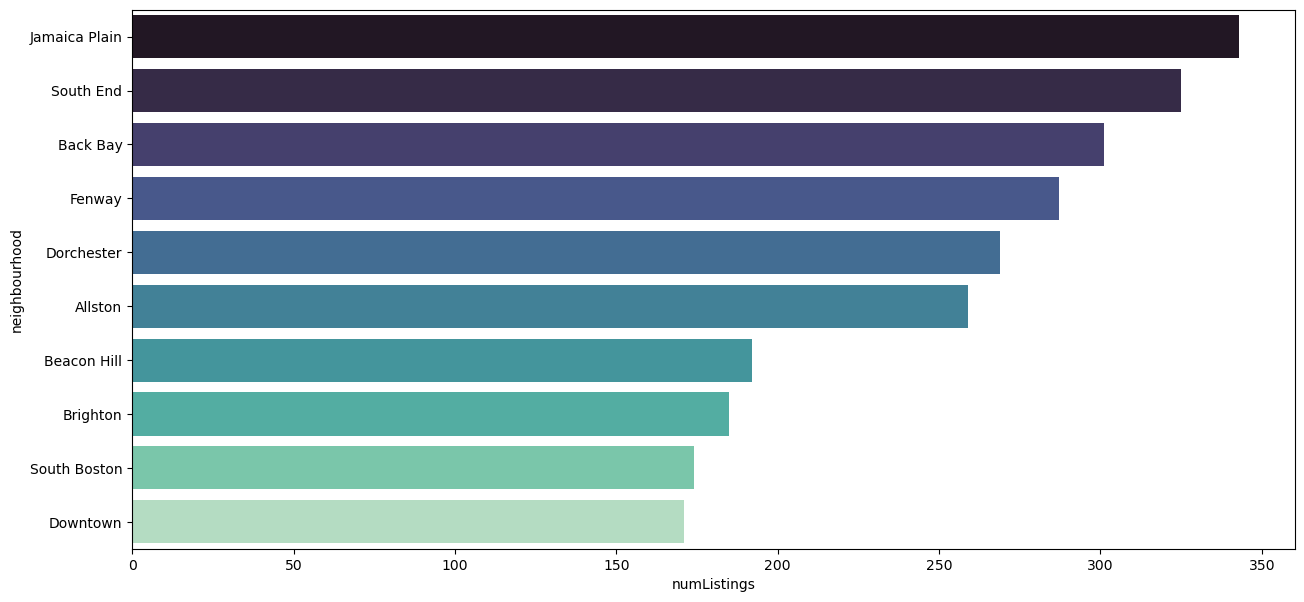

In [321]:
# Choose a different palette

# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations ('rocket', 'mako', 'flare', 'crest')
palette=sns.color_palette("mako", 10)

# plot a bar chart
sns.barplot(
    x="numListings", 
    y="neighbourhood", 
    data=result, 
    palette=palette)